In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statistics
import matplotlib.pyplot as plt

In [3]:
sns.load_dataset("titanic")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df = sns.load_dataset("titanic")

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
df.select_dtypes(include=int)

,survived,pclass,sibsp,parch
0,0,3,1,0
1,1,1,1,0
2,1,3,0,0
3,1,1,1,0
4,0,3,0,0
...,...,...,...,...
886,0,2,0,0
887,1,1,0,0
888,0,3,1,2
889,1,1,0,0


In [14]:
df.select_dtypes(include=object)

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
...,...,...,...,...,...
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes


In [17]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [19]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [22]:
df.duplicated().sum()

107

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

0

In [31]:
df.reset_index(inplace=True, drop=True)

In [32]:
df

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
780,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
781,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
782,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [34]:
df.drop("index",axis=1,inplace=True)

In [35]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
780,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
781,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
782,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [37]:
df.isnull().sum()/df.shape[0] * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            13.520408
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.255102
class           0.000000
who             0.000000
adult_male      0.000000
deck           74.234694
embark_town     0.255102
alive           0.000000
alone           0.000000
dtype: float64

In [38]:
df.drop("deck",axis=1,inplace=True)

In [40]:
df.isnull().sum()/df.shape[0] 

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.135204
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002551
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.002551
alive          0.000000
alone          0.000000
dtype: float64

In [41]:
df.age.mean()

29.869351032448375

In [43]:
df["age"].fillna(method="ffill")

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
779    39.0
780    19.0
781    19.0
782    26.0
783    32.0
Name: age, Length: 784, dtype: float64

In [44]:
df["age"].fillna(method="ffill").mean()

29.760637755102035

In [45]:
df["age"].fillna(method="bfill")

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
779    39.0
780    19.0
781    26.0
782    26.0
783    32.0
Name: age, Length: 784, dtype: float64

In [46]:
df["age"].fillna(method="bfill").mean()

29.907640306122445

In [49]:
df["age"].fillna(value=df.age.mean(),inplace=True)

In [50]:
df.age.mean()

29.869351032448368

In [51]:
df["embark_town"].value_counts(dropna=False)

Southampton    568
Cherbourg      155
Queenstown      59
NaN              2
Name: embark_town, dtype: int64

In [52]:
df["embark_town"].fillna(method="bfill")

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
779     Queenstown
780    Southampton
781    Southampton
782      Cherbourg
783     Queenstown
Name: embark_town, Length: 784, dtype: object

In [54]:
df["embark_town"].fillna(method="bfill").value_counts(dropna=False)

Southampton    569
Cherbourg      156
Queenstown      59
Name: embark_town, dtype: int64

In [55]:
df["embark_town"].fillna(method="bfill",inplace=True)

In [56]:
df["embarked"].value_counts(dropna=False)

S      568
C      155
Q       59
NaN      2
Name: embarked, dtype: int64

In [57]:
df.drop("embarked",axis=1,inplace=True)

In [58]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,39.000000,0,5,29.1250,Third,woman,False,Queenstown,no,False
780,1,1,female,19.000000,0,0,30.0000,First,woman,False,Southampton,yes,True
781,0,3,female,29.869351,1,2,23.4500,Third,woman,False,Southampton,no,False
782,1,1,male,26.000000,0,0,30.0000,First,man,True,Cherbourg,yes,True


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    object  
 3   age          784 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   class        784 non-null    category
 8   who          784 non-null    object  
 9   adult_male   784 non-null    bool    
 10  embark_town  784 non-null    object  
 11  alive        784 non-null    object  
 12  alone        784 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.8+ KB


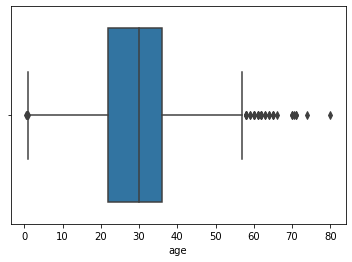

In [62]:
sns.boxplot(x=df.age);

In [64]:
df.age.describe()

count    784.000000
mean      29.869351
std       13.723745
min        0.420000
25%       22.000000
50%       29.869351
75%       36.000000
max       80.000000
Name: age, dtype: float64

In [66]:
q1 = np.percentile(df.age,25)
q2 = np.percentile(df.age,50)
q3 = np.percentile(df.age,75)
IQR = q3 - q1 

In [67]:
q1

22.0

In [68]:
q2

29.869351032448375

In [69]:
q3

36.0

In [70]:
IQR

14.0

In [71]:
q1 - 1.5*IQR

1.0

In [72]:
q3 + 1.5*IQR

57.0

In [74]:
df[df["age"]<57]

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,39.000000,0,5,29.1250,Third,woman,False,Queenstown,no,False
780,1,1,female,19.000000,0,0,30.0000,First,woman,False,Southampton,yes,True
781,0,3,female,29.869351,1,2,23.4500,Third,woman,False,Southampton,no,False
782,1,1,male,26.000000,0,0,30.0000,First,man,True,Cherbourg,yes,True


C:\Users\Acar47\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


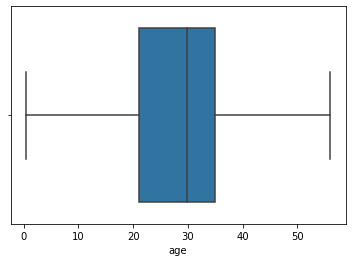

In [80]:
sns.boxplot(df[df["age"]<57]["age"]);

In [81]:
df[df["age"]<57]

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,39.000000,0,5,29.1250,Third,woman,False,Queenstown,no,False
780,1,1,female,19.000000,0,0,30.0000,First,woman,False,Southampton,yes,True
781,0,3,female,29.869351,1,2,23.4500,Third,woman,False,Southampton,no,False
782,1,1,male,26.000000,0,0,30.0000,First,man,True,Cherbourg,yes,True


In [82]:
df = df[df["age"]<57]

In [83]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,39.000000,0,5,29.1250,Third,woman,False,Queenstown,no,False
780,1,1,female,19.000000,0,0,30.0000,First,woman,False,Southampton,yes,True
781,0,3,female,29.869351,1,2,23.4500,Third,woman,False,Southampton,no,False
782,1,1,male,26.000000,0,0,30.0000,First,man,True,Cherbourg,yes,True


In [84]:
df.reset_index(drop=True,inplace=True)

In [85]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,3,female,39.000000,0,5,29.1250,Third,woman,False,Queenstown,no,False
745,1,1,female,19.000000,0,0,30.0000,First,woman,False,Southampton,yes,True
746,0,3,female,29.869351,1,2,23.4500,Third,woman,False,Southampton,no,False
747,1,1,male,26.000000,0,0,30.0000,First,man,True,Cherbourg,yes,True


C:\Users\Acar47\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


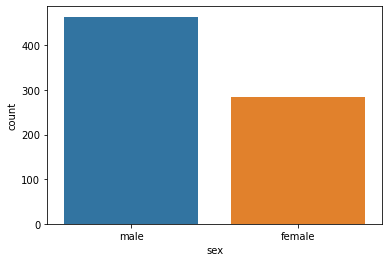

In [88]:
sns.countplot(df["sex"]);

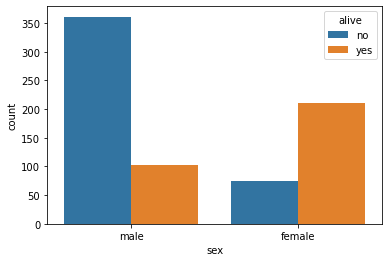

In [89]:
sns.countplot(x=df["sex"], hue=df["alive"]);

C:\Users\Acar47\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


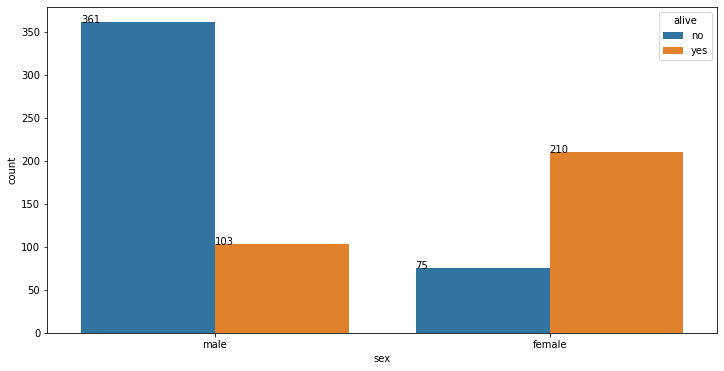

In [148]:
fig,ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(df["sex"],hue=df["alive"]);
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x(), p.get_height()))

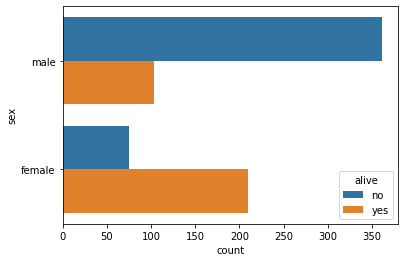

In [90]:
sns.countplot(y=df["sex"], hue=df["alive"]);

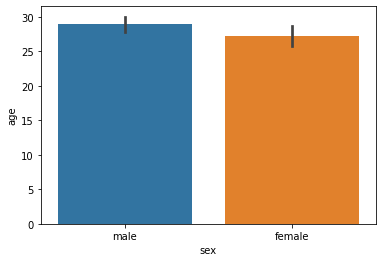

In [91]:
sns.barplot(data=df, x="sex", y="age");

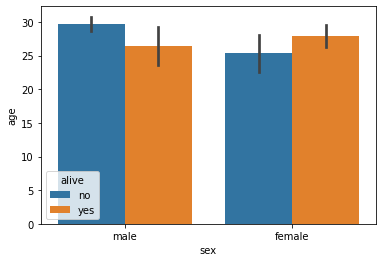

In [92]:
sns.barplot(data=df, x="sex", y="age", hue="alive");


#estimator = "mean" default 

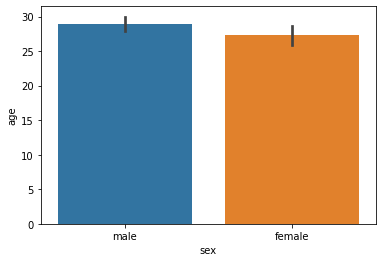

In [104]:
sns.barplot(data=df, x="sex", y="age");

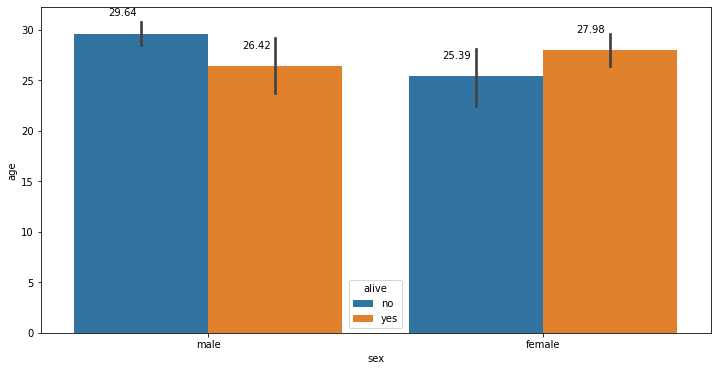

In [168]:
fig,ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(data=df, x="sex", y="age", hue="alive");
for p in ax.patches:
    ax.annotate(round(p.get_height(),2),(p.get_x()+0.10, p.get_height()+1.8))

In [107]:
df[df["sex"]=="male"]["age"].mean()

28.928136252670118

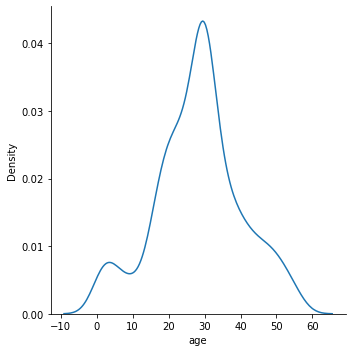

In [111]:
sns.displot(x=df["age"],kind="kde");

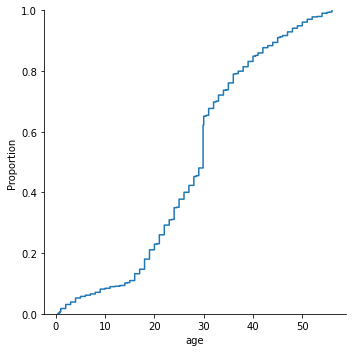

In [112]:
sns.displot(x=df["age"],kind="ecdf");

In [118]:
df2 = df[["age","sibsp"]]

In [119]:
df2

,age,sibsp
0,22.000000,1
1,38.000000,1
2,26.000000,0
3,35.000000,1
4,35.000000,0
...,...,...
744,39.000000,0
745,19.000000,0
746,29.869351,1
747,26.000000,0


<AxesSubplot:ylabel='Density'>

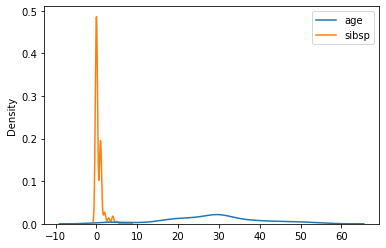

In [120]:
sns.kdeplot(data=df2)

<AxesSubplot:xlabel='age', ylabel='Density'>

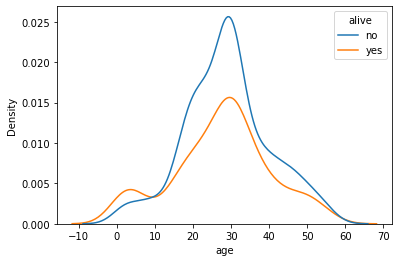

In [121]:
sns.kdeplot(x=df["age"], hue=df["alive"])

<AxesSubplot:xlabel='age', ylabel='Density'>

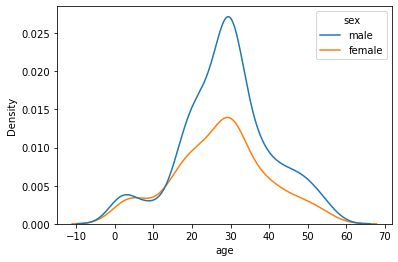

In [126]:
sns.kdeplot(x=df["age"], hue=df["sex"])

<AxesSubplot:xlabel='age', ylabel='sibsp'>

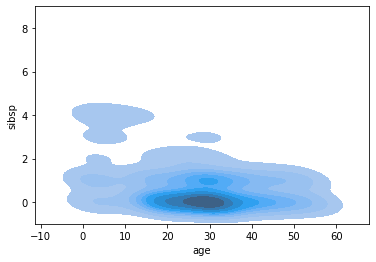

In [136]:
sns.kdeplot(data=df,x="age",y="sibsp", fill=True)

<AxesSubplot:xlabel='age', ylabel='sibsp'>

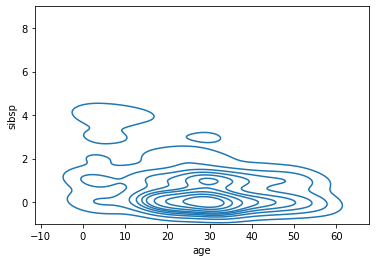

In [137]:
sns.kdeplot(data=df,x="age",y="sibsp", fill=False)

In [138]:
df.groupby("sex")["age"].mean()

sex
female    27.299705
male      28.928136
Name: age, dtype: float64

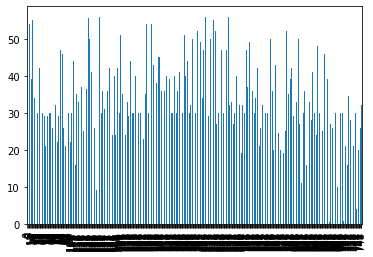

In [142]:
df.groupby("sex")["age"].plot(kind="bar");

In [ ]:
plt.pie